# RNNs, Part 1

## Word Embeddings 
How do we represent words to neural networks? 

There are continuous values for images, but text? Words are characters, characters have ASCII codes --- this is not very intuitive! 



## Recall: 

Autoencoders can be used to learn an **embedding space**. 

- Encoder: Data --> Embedding 
- Decoder: Embedding --> Data 

Now, how can we learn **embedding of words**? 

We CANNOT use a similar approach! 

If we represent a word using just an autoencoder, we DO NOT capture meaning of words!

You need CONTEXT to know what the word means. 


## Two things to consider: 

- How do we encode the word? 
- What is our target? 

What should the **decoder** convert the embedding to? 

## One-hot encoding of words 

Each word has its own **index**. This is usually done through **alphabetical order**

If there are 10,000 words, there are 10,000 features 

One-hot embedding as **input to the encoder** 

Encoder: One-hot embedding -> low dim embedding 

Decoder: Low-dim embedding -> ??? 

**The issue?** There are way too many words in our dictionary!

But, we still use it! If we just use indices directly, because there are relationships between numbers, the neural network may learn that closer indices can have similar meanings. 

This is NOT the case! 

So we use one-hot encoding 


## Why do we need embeddings? 

One-hot encoding carries ZERO SEMANTIC meaning! Dot producting these unit vectors will always give you zero 

We want words that are semantically relevant to be close to each other. 

## Word Embeddings 

Words are different from images. 

Characters are NOT LIKE PIXELS in images. The **meaning of a word** is not represented by the letter that make up the word. 

Meaning comes from the sequence of characters and how they are used IN CONJUNCTION with other words. 

## Text as Sequences 

Key Idea: The meaning of a word **depends on its context**, or other words that apepar nearby. 

### Architecture of a word2vec model 

Encoder: one-hot embedding --> low-dim embedding 

Decoder: low-dim embedding --> nearby words

We want to try to reconstruct **not the word itself**, but the **context**/words occuring with them. 

### Example of word2vec 

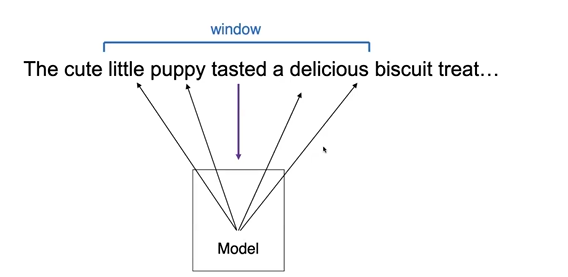

Note that this is an **unsupervised** task. We will chunk the text data into windows, then slide this window. 

For each window, pass the **middle word** as the input to the model, learn the embedding. Then, try to reconstruct the context surrounding it! 

That means, the embedding of the word includes information about the context of words that they may be included in. 

For example words like patient, nurse, doctor, will have similar embeddings semantically. These words occur in a similar context, so they are semantically relevant 

## Skipgram and CBOW models 

You can FLIP the inputs and outputs 

We can pass in the **context**, then just fill in the **missing word** in the center! 

### Skipgram
--> Predict context from target 

Even for humans, this task is already more difficult! 

Skip-Gram components need not be consecutive in the text. Can be skipped over or randomly selected from many documents. You can **skip** some words, it's kinda of like augmentation where we see situations where words are escaped. 

**n-Gram**: Contiguous sequence of n items from a given text. 

**k-Skip n-Gram**: n-gram that can involve a skip-operation of size k or smaller. 

So, "1-skip 3-Gram" means it is 3 items, maximum skip of 1

**Window Size**: This is a hyperparameter. 

Now the authors of the paper proposed to NOT do this. 4 word window, 10000 dictionary size means predicting 40000 classes! This is not great. 

The alternative is just to predict EACH ONE 

(tasted, litte)

(tasted, puppy)

(tasted, a)

(tasted, delicious)

Rather than predicting all 4 words at the same time, chunk up the training data like this. 

Now which one is the target training class? The practical answer is that, you are just sampling the batch. If the training example is for "little", if it predicts other words in that context, it is STILL WRONG. 

As training progresses, neural network will embeddings such that it'll have higher probability for words in that context. Note that Cross Entropy loss has probabilities. It'll minimize the loss by compressing these meanings into the embedding.

**Skip Grams are actually pretty shallow**

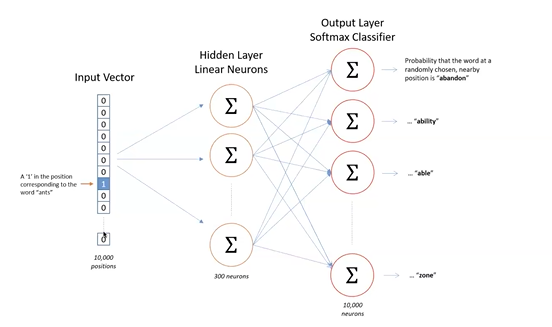



Note the output layer is only used for training! After the model is trained, we **only keep the weights from input to hidden layer**. 

Words that have similar context words will be mapped to similar embeddings! 

Also, an assumption is that you can capture **every possible word**. I mean, if you take the whole internet, there are way too small of a chance it has not showed up. 

So we would pass a word into one-hot, put into linear layer, and get an **EMBEDDING LOOKUP TABLE**. 


### CBOW (Continuous bag of words)
--> Predict target from context 

But surprisingly, Skip-Grams perform better because the task is actually difficult! So for word2vec, use skipgrams.  

Hence we usually get better meanings. 

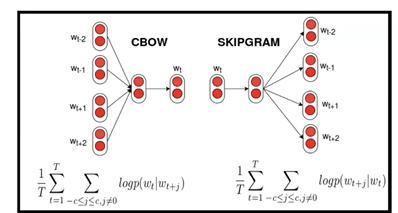

## GloVe 

Word2Vec does NOT have any explicit global information. It looks into a very small window of text. It enforces global information into the embeddings. 

- Compute **co-occurrence frequency counts** for each word, represented as a matrix where element $X_{ij}$ denotes the number of times word i appears in the context of words j. This is done through a co-occurent matrix.

### Co-occurrence Matrix 
NxN matrix. 

Take one-hot of i, one-hot of j, pass into encoder, then do a dot product between the embeddings. Pass this dot product into an output layer, then it PREDICTS 

The embeddings of the word should be able to capture these statistics! 

- **Optimization:** Inner product of word vectors should be a GOOD PREDICTOR of co-occurrence frequency. 



## PyTorch GloVE Embeddings 

just do 

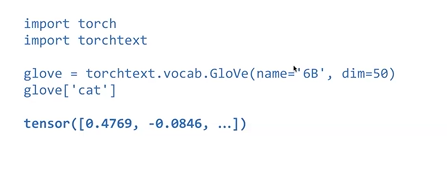

50-dimension. 

This is a lookup table!

## Distance Measures 
In order to talk about which words have similar embeddings, we need to introduce a **measure of distance** in the embedding space. 

### Euclidean Distance 

--> L2-norm of embeddings. 

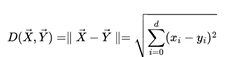

This is sensitive, however 

`torch.norm(glove['cat'] - glove['dog'])`

### Cosine Similarity 
Cosine of the angle between embeddings (invariant to magnitude as normalized by length of vectors)

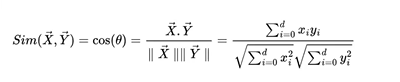

`torch.cosine_similarity(glove['cat'].unsqueeze(0), glove['dog'].unsqueeze(0))`

## Word Analogies 

One surprising thing about the embedding space is the extent of its structure. 

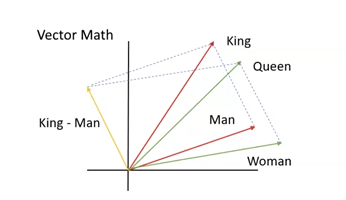

These are geometric relationships we often see in GloVe embeddings.

For example, King-Man+Woman can give "Queen". That is, doing this math through embeddings, the nearest resulting embedding is something like "Queen". 

## Bias in Word Embeddings 

These models are NOT unbiased! 

Doctor - man + women = Nurse??? 

Internet data, includes that back in the day, most doctors were men and most nurses nowadays are women. 

## Motivation for RNNs

### Dataset: Sentiment 140 
1,600,000 tweets collected by students doing a course project. 

Is this tweet happy? Sad? 

For each tweet in the data
1. Split tweet into words 
2. Look up the GloVe embedding for each word, **ignore words without embeddings**
3. Add up the word embeddings to obtain an embedding for the entire tweet. 
4. The tweet embedding will be the input to a **fully-connected neural network**. 

### Limitations 
The ORDER of words are very important!

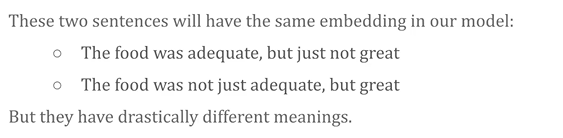

## RNNs 

### Idea 1: CONCATENATE the word embeddings
This is not adding 

This make a HUGE vector, despite keeping the order. This is very inefficient! 

The lengths also NEED TO BE FIXED! The MLP cannot have deal with varying lengths; you'd need to do some kind of zero-padding. 

### Idea 2: 
Concatenate, then train a 1-dimensional CNN. 

This reduces the length of the sentence. 

BUT! 

Long-range dependencies are NOT considered! 

"The cat that the dog chased ran away" --> Cat and ran are related here! 

### Idea 3: RNNs 
Can take in **variable-sized sequential input**. 

Can remember things over time through a **HIDDEN STATE**! 

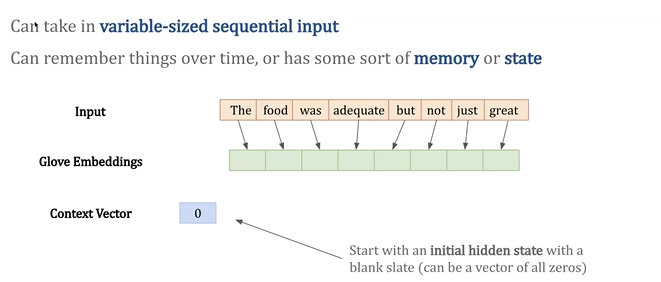

The hidden state is a memory vector. It starts off with NO MEMORY, so a vector of 0s

Use the embedding of current word, the current hidden state, you will update this memory!

`hidden = update_function(hidden, input)`

Continue this until you exhaust all the words!



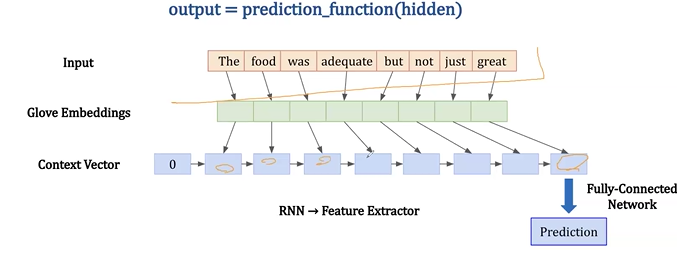

On paper, the last version of the memory contains all the information of the sequence! 

## Mathematical Understanding 

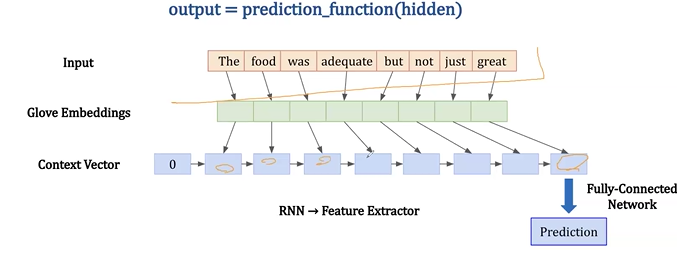

`rnn_layer = nn.RNN(input_size=50, hidden_size=64, batch_first=True)`

This is one linear neural network! 

$h_t$ is the updated memory, with nonlinearity applied

$y_t$ is the output, with nonlinearity applied

### Important warnings 
- Note that input size is NOT length. This is dimension of the INPUT TOKEN! 
- The hidden_size is the **dimension of hidden state**. 
- batch_first: By default, nn.RNN outputs [sequence, batch, feature], this is efficient to compute internally, so the output just does [batch, sequence, feature]

## Deep & Bidirectional RNNs